# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
# 2. Load the dataset
porterdata = pd.read_csv("porter_data_1.csv")
porterdata.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [3]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
# 2.1.1 Convert datetime columns
porterdata['created_at'] = pd.to_datetime(porterdata['created_at'])
porterdata['actual_delivery_time'] = pd.to_datetime(porterdata['actual_delivery_time'])
porterdata.head()



market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [4]:
# Convert categorical features to category type
# 2.1.2 Convert categorical columns
categorical_cols = ['store_primary_category', 'order_protocol']
porterdata[categorical_cols] = porterdata[categorical_cols].astype("category")



#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [5]:
# Calculate time taken in minutes
# 2.2.1 Create target variable (time_taken in minutes)
porterdata['time_taken'] = (porterdata['actual_delivery_time'] - porterdata['created_at']).dt.total_seconds() / 60
porterdata['time_taken'].head()

0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: time_taken, dtype: float64

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [6]:
# Extract the hour and day of week from the 'created_at' timestamp
# 2.2.2 Extract hour, day of week and isWeekend
porterdata['order_hour'] = porterdata['created_at'].dt.hour
porterdata['day_of_week'] = porterdata['created_at'].dt.dayofweek
porterdata['is_weekend'] = porterdata['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


# Create a categorical feature 'isWeekend'



In [7]:
# Drop unnecessary columns
# 2.2.3 Drop columns not needed
porterdata.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [8]:
# Define target variable (y) and features (X)
# 2.3.1 Define features and target
y = porterdata['time_taken']
X = porterdata.drop('time_taken', axis=1)

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)
X.head()



market_id  total_items  subtotal  num_distinct_items  min_item_price  \
0        1.0            4      3441                   4             557   
1        2.0            1      1900                   1            1400   
2        2.0            4      4771                   3             820   
3        1.0            1      1525                   1            1525   
4        1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  ...  store_primary_category_69  \
0                      21.0     34.44  ...                      False   
1                       2.0     27.60  ...                      False   
2                      18.0     11.56  ...                      False   
3                       8.0     31.80  ...                      False   
4                       7.0      8.20  ...                      False   

   store_primary_category_70  store_primary_category_71  \
0                      False                      False   
1                      False                      False   
2                      False                      False   
3                      False                      False   
4                      False                      False   

   store_primary_category_72  order_protocol_2.0  order_protocol_3.0  \
0                      False               False               False   
1                      False                True               False   
2                      False               False                True   
3                      False               False               False   
4                      False               False               False   

   order_protocol_4.0  order_protocol_5.0  order_protocol_6.0  \
0               False               False               False   
1               False               False               False   
2               False               False               False   
3               False               False               False   
4               False               False               False   

   order_protocol_7.0  
0               False  
1               False  
2               False  
3               False  
4               False  

[5 rows x 91 columns]

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [37]:
# Split data into training and testing sets
# 2.3.2 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)



## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [40]:
# Define numerical and categorical columns for easy EDA and data manipulation
# 3.1.1 Plot numerical distributions




##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

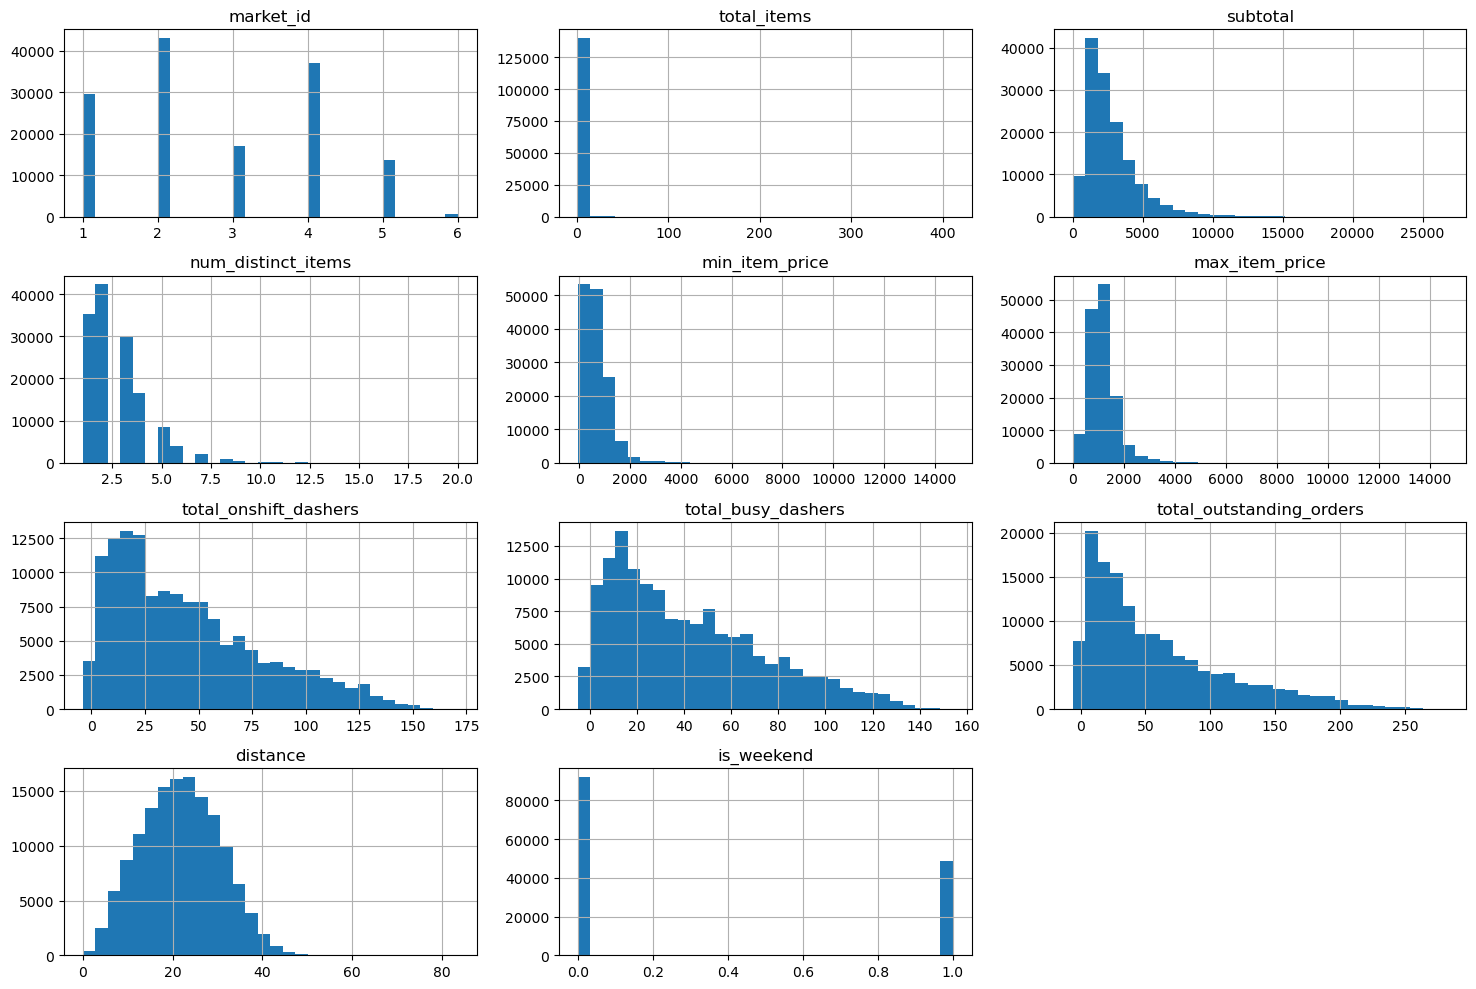

In [39]:
# Plot distributions for all numerical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[num_cols].hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

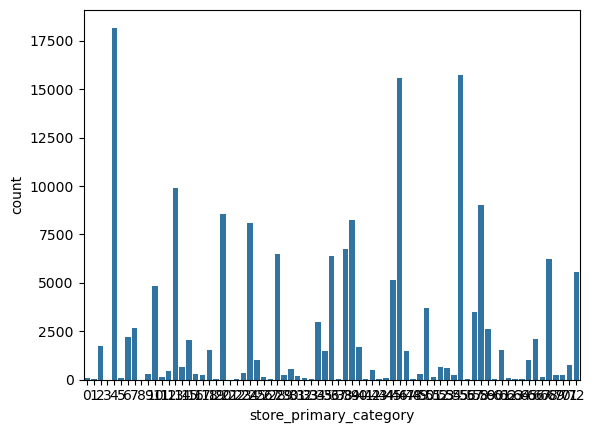

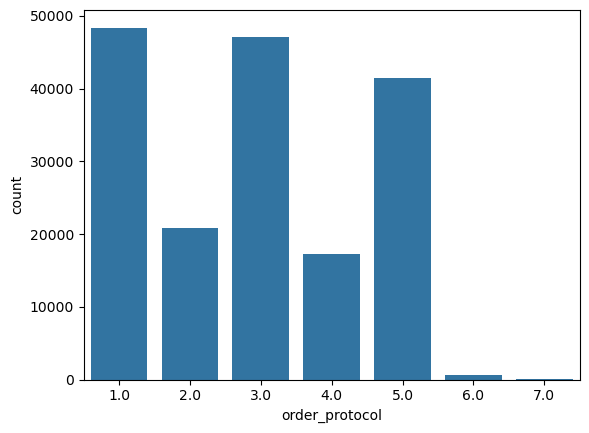

In [42]:
# Distribution of categorical columns
# 3.1.2 Plot categorical features (if any)
categorical_cols = porterdata.select_dtypes(include=['category']).columns
for col in categorical_cols:
    sns.countplot(data=porterdata, x=col)
    plt.show()



##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

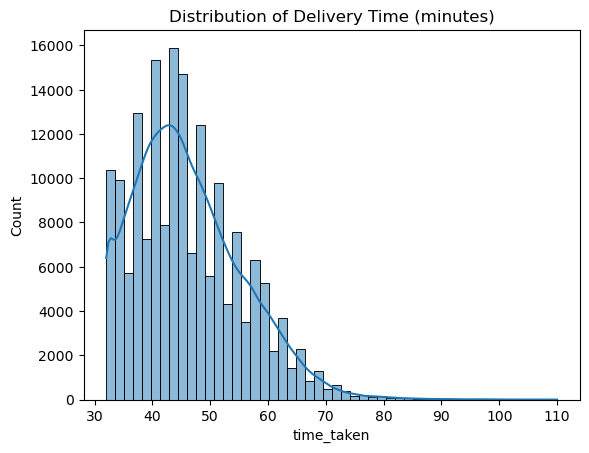

In [43]:
# Distribution of time_taken
# 3.1.3 Distribution of target variable
sns.histplot(porterdata['time_taken'], bins=50, kde=True)
plt.title("Distribution of Delivery Time (minutes)")
plt.show()



#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [46]:
# Scatter plot to visualise the relationship between time_taken and other features



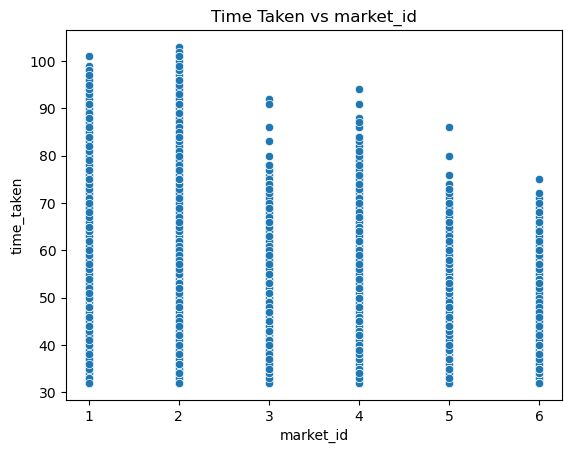

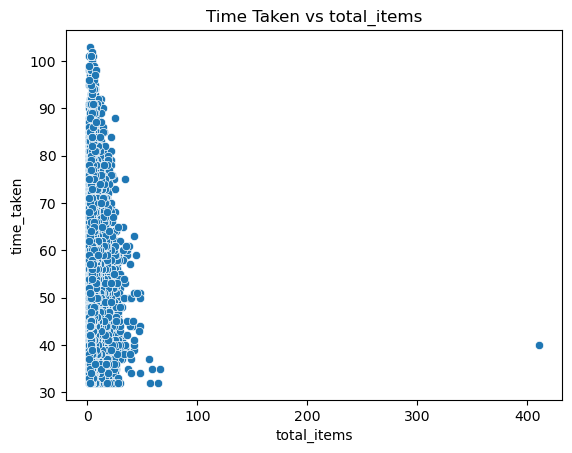

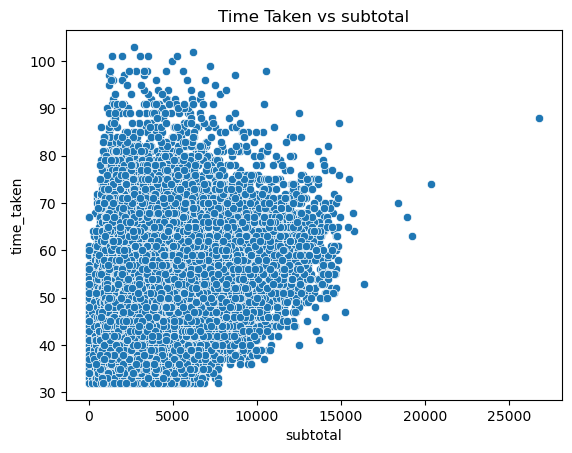

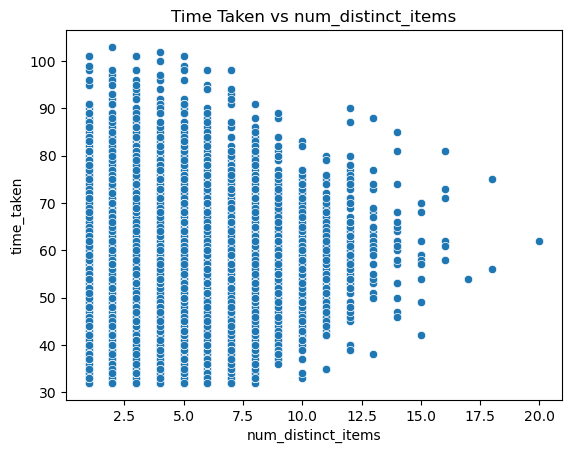

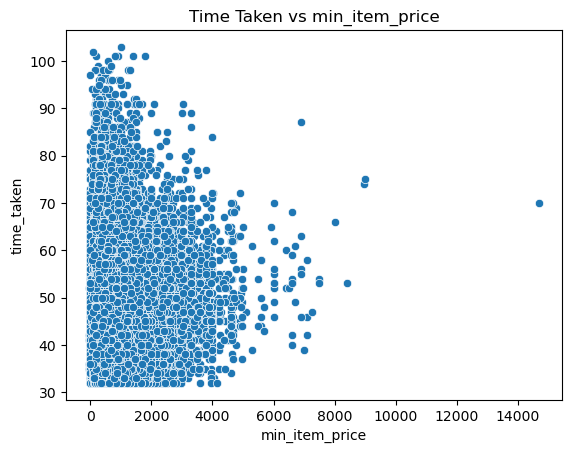

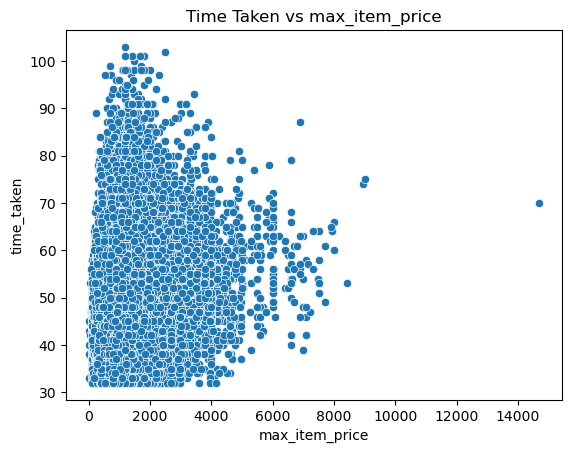

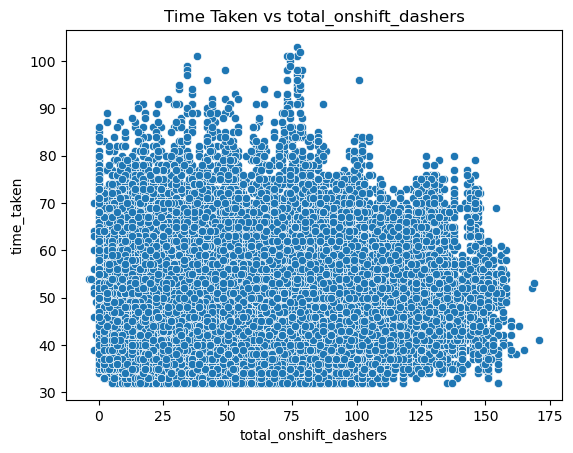

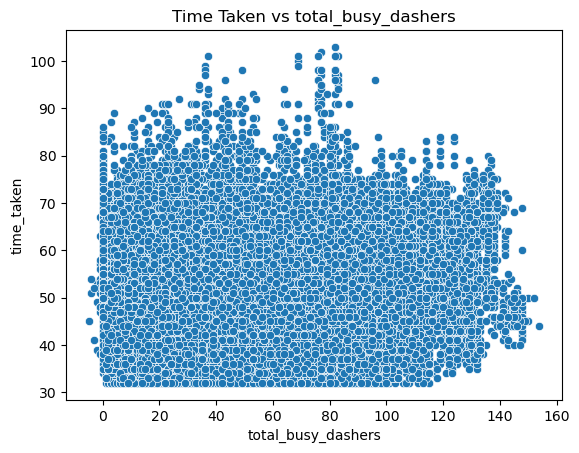

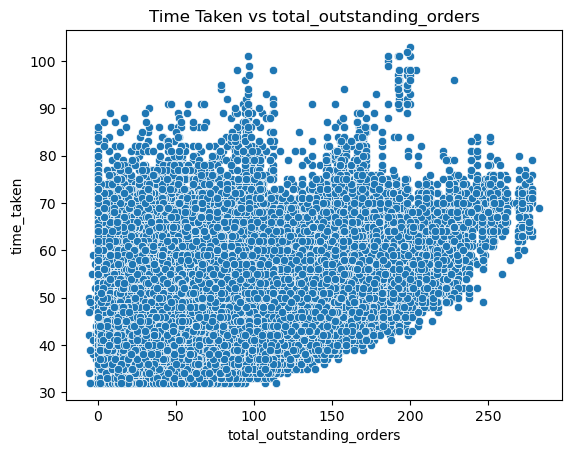

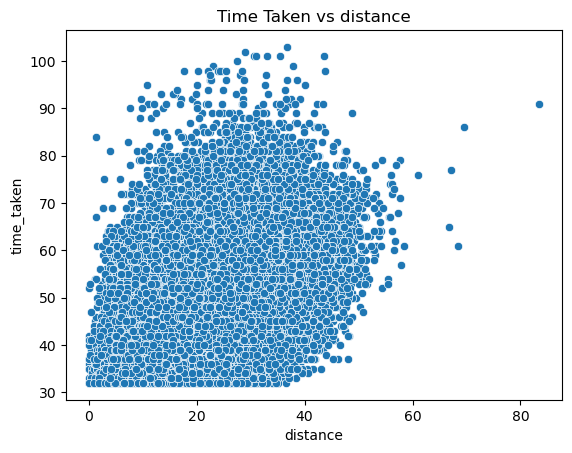

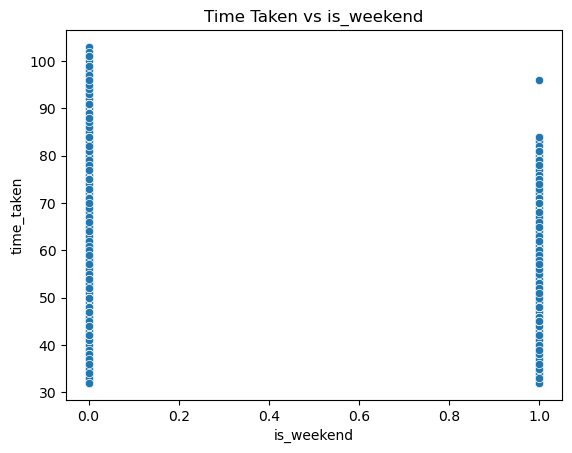

In [45]:
# Show the distribution of time_taken for different hours
for col in num_cols:
    sns.scatterplot(x=X_train[col], y=y_train)
    plt.title(f"Time Taken vs {col}")
    plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

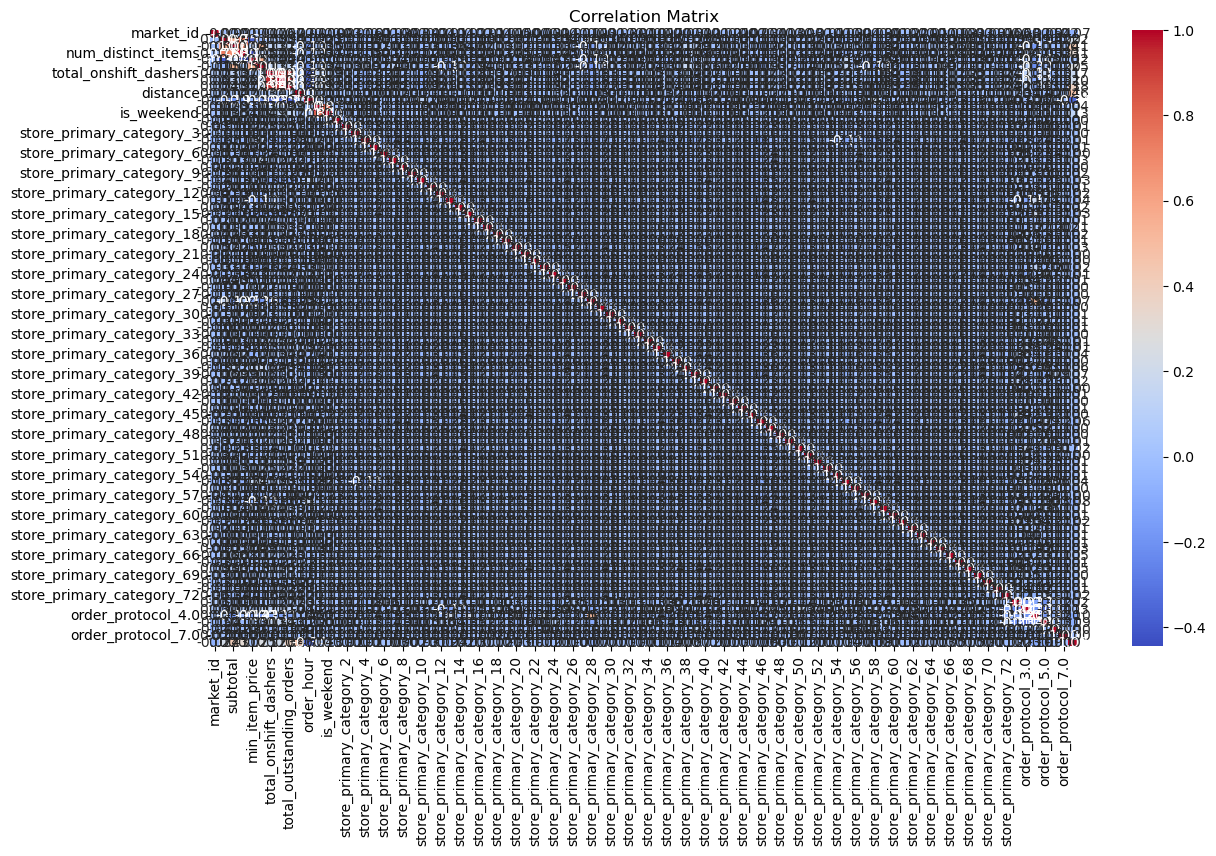

In [47]:
# Plot the heatmap of the correlation matrix
corr = pd.concat([X_train, y_train], axis=1).corr()
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [48]:
# Drop 3-5 weakly correlated columns from training dataset
# 3.3.2 Drop weakly correlated columns (example based on correlation inspection)
drop_cols = ['min_item_price', 'max_item_price', 'num_distinct_items']
X_train.drop(columns=drop_cols, inplace=True, errors='ignore')
X_test.drop(columns=drop_cols, inplace=True, errors='ignore')



#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

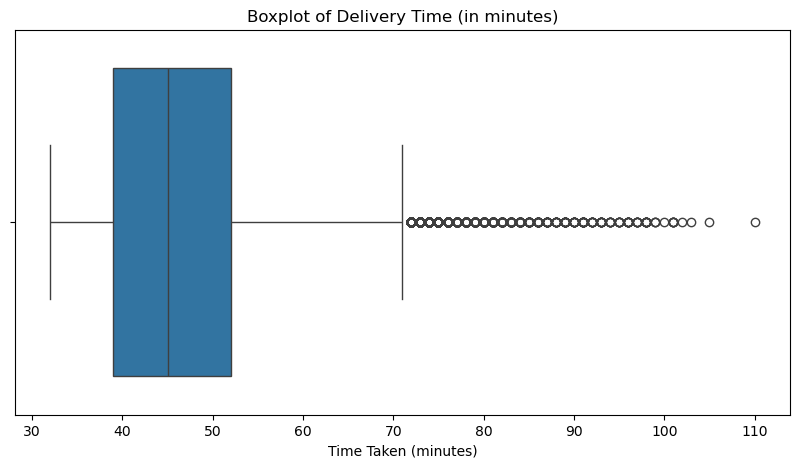

In [50]:
# Boxplot for time_taken
plt.figure(figsize=(10, 5))
sns.boxplot(x=porterdata['time_taken'])
plt.title("Boxplot of Delivery Time (in minutes)")
plt.xlabel("Time Taken (minutes)")
plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [51]:
# Handle outliers
q_low = y_train.quantile(0.01)
q_hi  = y_train.quantile(0.99)
mask = (y_train > q_low) & (y_train < q_hi)
X_train = X_train[mask]
y_train = y_train[mask]



## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [20]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [21]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [22]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [23]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [24]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [25]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [26]:
# Import libraries



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [52]:
# Apply scaling to the numerical columns
# 5.1 Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [53]:
# Create/Initialise the model
lr = LinearRegression()

In [54]:
# Train the model using the training data
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [55]:
# Make predictions
y_pred = lr.predict(X_test_scaled)

In [56]:
# Find results for evaluation metrics
print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R^2 Score: 0.8809239969320886
RMSE: 3.2237078284941236


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [57]:
# Loop through the number of features and test the model
rfe = RFE(estimator=LinearRegression(), n_features_to_select=8)
rfe.fit(X_train_scaled, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=8)

In [58]:
# Build the final model with selected number of features
X_train_sel = X_train_scaled[:, rfe.support_]
X_test_sel = X_test_scaled[:, rfe.support_]

lr_sel = LinearRegression()
lr_sel.fit(X_train_sel, y_train)
y_pred_sel = lr_sel.predict(X_test_sel)

print("Selected R^2 Score:", r2_score(y_test, y_pred_sel))


Selected R^2 Score: 0.8699305972700502


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

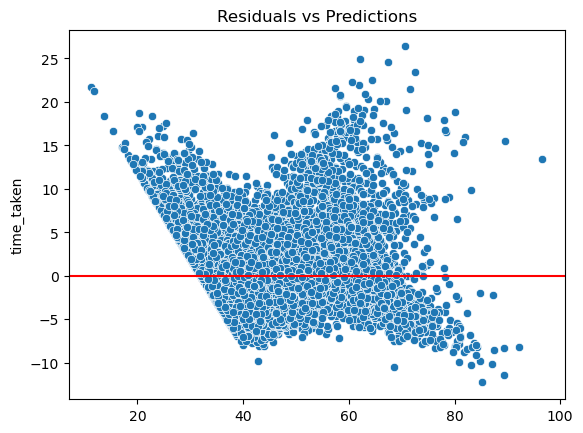

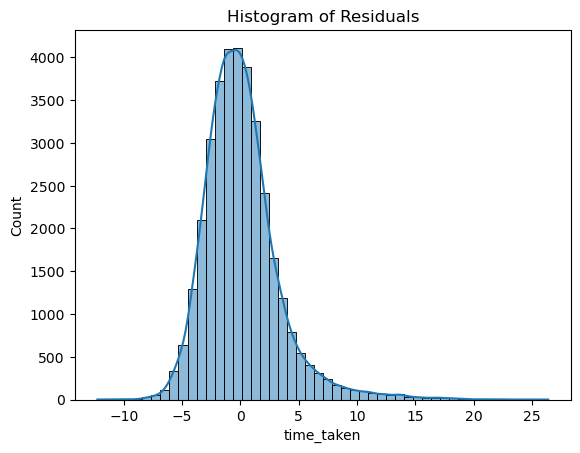

In [59]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red')
plt.title("Residuals vs Predictions")
plt.show()

sns.histplot(residuals, bins=50, kde=True)
plt.title("Histogram of Residuals")
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


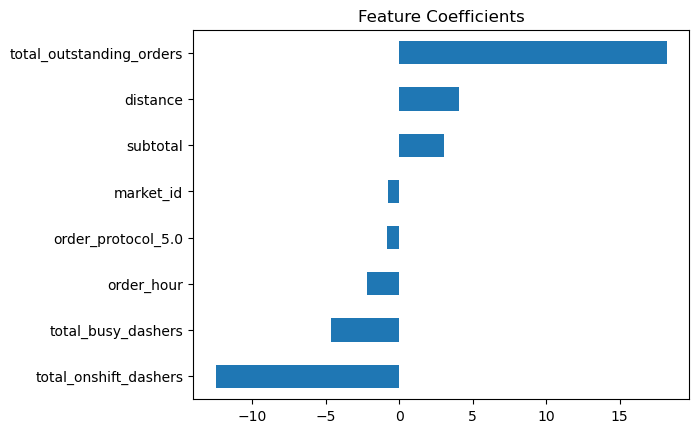

In [62]:
# Compare the scaled vs unscaled features used in the final model
coeffs = pd.Series(lr_sel.coef_, index=X_train.columns[rfe.support_])
coeffs.sort_values().plot(kind='barh')
plt.title("Feature Coefficients")
plt.show()


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [63]:
# Analyze the effect of a unit change in a feature, say 'total_items'


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, there are categorical variables such as store_primary_category, order_protocol, day_of_week, and is_weekend.
These variables influence customer demand and logistics. For instance:

store_primary_category: Some store types may involve longer prep times (e.g., restaurants vs. grocery).

order_protocol: Different ordering methods may affect dispatch timing.

day_of_week and is_weekend: Weekend orders may face different traffic and dasher availability, increasing delivery time.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>It means that 20% of the total dataset is used as the test set, while the remaining 80% is used for training. This helps evaluate model performance on unseen data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>From the correlation matrix, features like subtotal and total_items often show higher positive correlation with time_taken, as larger orders typically require more preparation and longer delivery time.





---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>Outliers were detected using:

Boxplot for time_taken.

Quantile-based filtering (e.g., removing values outside the 1st and 99th percentiles).

Handling:

Removed extreme time_taken values to avoid skewing the model.





---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>After feature selection (RFE and correlation analysis), the most significant features were:

subtotal – Higher cost often correlates with more/complex items.

total_items – More items = longer prep time.

distance – Greater distance logically increases delivery time.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression models a linear relationship between independent variables (X) and a dependent variable (y).
Formula:

𝑦
=
𝛽
0
+
𝛽
1
𝑥
1
+
𝛽
2
𝑥
2
+
⋯
+
𝛽
𝑛
𝑥
𝑛
+
𝜖
y=β 
0
​
 +β 
1
​
 x 
1
​
 +β 
2
​
 x 
2
​
 +⋯+β 
n
​
 x 
n
​
 +ϵ

β are the coefficients learned from data.

It minimizes the cost function (usually MSE) using least squares to find the best-fit line.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Feature	Simple Linear Regression	Multiple Linear Regression
Variables	One independent variable	Two or more independent variables
Equation Form	
𝑦
=
𝛽
0
+
𝛽
1
𝑥
+
𝜖
y=β 
0
​
 +β 
1
​
 x+ϵ	
𝑦
=
𝛽
0
+
𝛽
1
𝑥
1
+
⋯
+
𝛽
𝑛
𝑥
𝑛
+
𝜖
y=β 
0
​
 +β 
1
​
 x 
1
​
 +⋯+β 
n
​
 x 
n
​
 +ϵ
Use Case	Basic prediction or trend	Complex predictions involving many factors



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function measures how far off predictions are from actual values.
Commonly used: Mean Squared Error (MSE):


 
It's minimized using optimization (like Gradient Descent or Normal Equation) to find the best model.






---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting
>Model fits training data too closely
>High train accuracy, low test accuracy
>Too many features, complex model
>Regularization, pruning, more data
>
>Underfitting
>Model is too simple to capture patterns
Low accuracy on both train and test
Too few features, overly simple model
Add features, increase complexity





---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots show the difference between actual and predicted values.
They're useful to:

Check if residuals are randomly scattered (good fit).

Detect non-linearity or heteroscedasticity (bad sign).

Reveal outliers or missing patterns.

A well-fitted linear model will have residuals centered around zero with no clear pattern.